#BTC ALPHA NETWORK DESCRIPTIVE ANALYTICS NOTEBOOK
<section>
    <h3>Authors</h3>
    <ul>
        <li>Gwendoline Hays-Valentin - <a href="mailto:g.hays-valentin@university.edu">g.hays-valentin@university.edu</a>, University of Paris 1 Panthéon-Sorbonne </li>
        <li>Charaf ZGUIOUAR - <a href="mailto:charaf.zguiouar@university.edu">charaf.zguiouar@university.edu</a>, University Panthéon-Sorbonne of Paris 1</li>
    </ul>
</section>
<h3>Source</h3>
<section>
    <p>The BTC Alpha dataset is a comprehensive collection representing the trust relationships among users of the Bitcoin Alpha platform, a trading environment where Bitcoin is the primary currency. This unique dataset includes nodes representing users, edges indicating trust ratings between users, and the weights of these edges signifying the degree of trust or distrust (ranging from -10 to +10). The data comes from a detailed study aimed at understanding the dynamics of trust within the context of cryptocurrency trading. For more information and access to the dataset, visit the <a href="https://snap.stanford.edu/data/soc-sign-bitcoin-alpha.html" target="_blank">Stanford Network Analysis Project (SNAP) website</a>.</p>
</section>


In [1]:
# required libraries
!pip install prettytable

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Imports & read datasets in csv format

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import seaborn as sns
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell

In [4]:
nodes = pd.read_csv('soc-sign-bitcoinalpha-dataset-nodes-table.csv')
edges = pd.read_csv('soc-sign-bitcoinalpha-dataset-edge-table.csv')
df =  pd.read_csv('soc-sign-bitcoinalpha.csv', header = None)
df =  df.rename(columns = {0:'SOURCE', 1:'TARGET', 2:'RATING', 3:'TIME'})


# **First Part : Descriptive Statistics**


## Overview tables
#### Below is a description of the columns of our dataset, in addition to summary stastics tables of the tables of our dataset.


In [5]:
InteractiveShell.ast_node_interactivity = "all"
display(nodes.columns)
display(nodes.head())
display(nodes.dtypes)
print('-'*20)
print(edges.columns)
print(edges.head())
print(edges.dtypes)
print('-'*20)
print(df.columns)
print(df.head())
print(df.dtypes)

Index(['Id', 'Class', 'timeset', 'indegree', 'outdegree', 'Degree',
       'weighted indegree', 'weighted outdegree', 'Weighted Degree',
       'Eccentricity', 'closnesscentrality', 'harmonicclosnesscentrality',
       'betweenesscentrality', 'Authority', 'Hub', 'pageranks',
       'componentnumber', 'strongcompnum', 'modularity_class',
       'stat_inf_class', 'clustering', 'eigencentrality'],
      dtype='object')

Id  Class  timeset  indegree  outdegree  Degree  weighted indegree  \
0  7604     -1      NaN        73         21      94               -628   
1  5342     -1      NaN        39         80     119                  0   
2  7602     -1      NaN        17         13      30               -150   
3  7594     -1      NaN         8          6      14                -61   
4   708     -1      NaN         7         24      31                 12   

   weighted outdegree  Weighted Degree  Eccentricity  ...  \
0                 110             -518             6  ...   
1                -249             -249             6  ...   
2                  10             -140             7  ...   
3                 -60             -121             7  ...   
4                -128             -116             7  ...   

   betweenesscentrality  Authority       Hub  pageranks  componentnumber  \
0              0.002901   0.080527  0.025972        NaN                0   
1              0.006124   0.048157  0.049823        NaN                0   
2              0.000075   0.027852  0.021469        NaN                0   
3              0.000089   0.008680  0.007923        NaN                0   
4              0.000240   0.007487  0.011672        NaN                0   

   strongcompnum  modularity_class  stat_inf_class  clustering  \
0            506                 2              39    0.097339   
1            506                13              32    0.040049   
2            506                 2              19    0.338768   
3            506                13              93    0.138889   
4            506                13              44    0.035000   

   eigencentrality  
0         0.388011  
1         0.241042  
2         0.142756  
3         0.047984  
4         0.035902  

[5 rows x 22 columns]

Id                              int64
Class                           int64
timeset                       float64
indegree                        int64
outdegree                       int64
Degree                          int64
weighted indegree               int64
weighted outdegree              int64
Weighted Degree                 int64
Eccentricity                    int64
closnesscentrality            float64
harmonicclosnesscentrality    float64
betweenesscentrality          float64
Authority                     float64
Hub                           float64
pageranks                     float64
componentnumber                 int64
strongcompnum                   int64
modularity_class                int64
stat_inf_class                  int64
clustering                    float64
eigencentrality               float64
dtype: object

--------------------
Index(['Source', 'Target', 'Type', 'Id', 'Label', 'timeset', 'Weight'], dtype='object')
   Source  Target      Type  Id  Label           timeset  Weight
0    7188       1  Directed   0    NaN  <[1407470400.0]>      10
1     430       1  Directed   1    NaN  <[1376539200.0]>      10
2    3134       1  Directed   2    NaN  <[1369713600.0]>      10
3    3026       1  Directed   3    NaN  <[1350014400.0]>      10
4    3010       1  Directed   4    NaN  <[1347854400.0]>      10
Source       int64
Target       int64
Type        object
Id           int64
Label      float64
timeset     object
Weight       int64
dtype: object
--------------------
Index(['SOURCE', 'TARGET', 'RATING', 'TIME'], dtype='object')
   SOURCE  TARGET  RATING        TIME
0    7188       1      10  1407470400
1     430       1      10  1376539200
2    3134       1      10  1369713600
3    3026       1      10  1350014400
4    3010       1      10  1347854400
SOURCE    int64
TARGET    int64
RATING    i

In [6]:
from prettytable import PrettyTable
# Summary table for 'nodes'
nodes_summary = PrettyTable()
nodes_summary.field_names = ["Attribute", "Description"]
nodes_summary.add_row(["Id", "Unique identifier for nodes"])
nodes_summary.add_row(["Class", "Classification of nodes"])
nodes_summary.add_row(["In/Outdegree", "Number of incoming/outgoing connections"])
nodes_summary.add_row(["Degree", "Total number of connections"])
nodes_summary.add_row(["Eccentricity", "Maximum distance from any other node"])
nodes_summary.add_row(["Centrality Measures", "Includes closeness, betweenness, eigencentrality, etc."])
nodes_summary.add_row(["Component Numbers", "Indicators for components and strong components"])
nodes_summary.add_row(["Modularity Class", "Community structure classification"])
nodes_summary.add_row(["Clustering", "The degree to which nodes cluster together"])
print("Summary for 'nodes' Dataset")
print(nodes_summary)
# Summary table for 'edges'
edges_summary = PrettyTable()
edges_summary.field_names = ["Attribute", "Description"]
edges_summary.add_row(["Source/Target", "Identifiers for the source and target of an edge"])
edges_summary.add_row(["Type", "Type of edge (Directed)"])
edges_summary.add_row(["Id", "Unique identifier for edges"])
edges_summary.add_row(["Label", "Optional label for edges"])
edges_summary.add_row(["Timeset", "Timestamp or time-related attribute for the edge"])
edges_summary.add_row(["Weight", "Weight of the edge, indicating strength or capacity"])
print("Summary for 'edges' Dataset")
print(edges_summary)
# Summary table for 'df'
df_summary = PrettyTable()
df_summary.field_names = ["Attribute", "Description"]
df_summary.add_row(["SOURCE/TARGET", "Identifiers for the source and target entities"])
df_summary.add_row(["RATING", "Rating or transaction value between the source and target"])
df_summary.add_row(["TIME", "Timestamp for when the rating or transaction occurred"])
print("Summary for 'df' Dataset")
print(df_summary)

Summary for 'nodes' Dataset
+---------------------+--------------------------------------------------------+
|      Attribute      |                      Description                       |
+---------------------+--------------------------------------------------------+
|          Id         |              Unique identifier for nodes               |
|        Class        |                Classification of nodes                 |
|     In/Outdegree    |        Number of incoming/outgoing connections         |
|        Degree       |              Total number of connections               |
|     Eccentricity    |          Maximum distance from any other node          |
| Centrality Measures | Includes closeness, betweenness, eigencentrality, etc. |
|  Component Numbers  |    Indicators for components and strong components     |
|   Modularity Class  |           Community structure classification           |
|      Clustering     |       The degree to which nodes cluster together       |


In [7]:
import pandas as pd
from prettytable import PrettyTable


quant_cols_nodes = ['indegree', 'outdegree', 'Degree', 'weighted indegree', 'weighted outdegree',
                    'Weighted Degree', 'Eccentricity', 'closnesscentrality',
                    'harmonicclosnesscentrality', 'betweenesscentrality',
                    'Authority', 'Hub', 'pageranks', 'clustering', 'eigencentrality']

# Calculate summary statistics
summary_stats_nodes = nodes[quant_cols_nodes].describe().transpose()

# Create PrettyTable
table_nodes = PrettyTable()
table_nodes.field_names = ["Variable", "Mean", "STD", "Min", "Median", "Max"]

for index, row in summary_stats_nodes.iterrows():
    table_nodes.add_row([index, f"{row['mean']:.2f}", f"{row['std']:.2f}", row['min'],
                         f"{nodes[index].median():.2f}", row['max']])
num_nodes = len(nodes)

# Adding the number of nodes to the summary table for 'nodes'
table_nodes.add_row(["---", "---", "---", "---", "---", "---"])  # Separator
table_nodes.add_row(["Number of Nodes", num_nodes, "", "", "", ""])


print("Summary Statistics for 'nodes'")
print(table_nodes)


###########################################################################EDGES


quant_cols_edges = ['Weight']

# Calculate summary statistics
summary_stats_edges = edges[quant_cols_edges].describe().transpose()

# Create PrettyTable
table_edges = PrettyTable()
table_edges.field_names = ["Variable", "Mean", "STD", "Min", "Median", "Max"]

for index, row in summary_stats_edges.iterrows():
    table_edges.add_row([index, f"{row['mean']:.2f}", f"{row['std']:.2f}", row['min'],
                         f"{edges[index].median():.2f}", row['max']])

# Assuming 'edges' DataFrame is already loaded
num_edges = len(edges)

# Adding the number of edges to the summary table for 'edges'
table_edges.add_row(["---", "---", "---", "---", "---", "---"])  # Separator
table_edges.add_row(["Number of Edges", num_edges, "", "", "", ""])

print("Summary Statistics for 'edges'")
print(table_edges)

###########################################################################DF
df['DATE'] = pd.to_datetime(df['TIME'], unit='s')

# Calculate summary statistics for 'RATING'
summary_stats_rating = df['RATING'].describe().transpose()

# Calculate statistics for 'DATE'
earliest_date = df['DATE'].min().strftime('%Y-%m-%d')
latest_date = df['DATE'].max().strftime('%Y-%m-%d')

# Create PrettyTable for 'RATING'
table_df = PrettyTable()
table_df.field_names = ["Variable", "Mean", "STD", "Min", "Median", "Max"]

table_df.add_row([
    "RATING",
    f"{summary_stats_rating['mean']:.2f}",
    f"{summary_stats_rating['std']:.2f}",
    int(summary_stats_rating['min']),
    f"{df['RATING'].median():.2f}",
    int(summary_stats_rating['max'])
])

# Add Date Range to Table
table_df.add_row(["DATE Range", "", "", earliest_date, "", latest_date])


# 'df' DataFrame already includes a converted 'DATE' column
num_rows_df = len(df)

# Adding the number of rows to the summary table for 'df'
table_df.add_row(["---", "---", "---", "---", "---", "---"])  # Separator
table_df.add_row(["Number of Rows", num_rows_df, "", "", "", ""])

print("Summary Statistics for 'df' with Dates")
print(table_df)

###################################################################



Summary Statistics for 'nodes'
+----------------------------+-------+-------+--------+--------+----------+
|          Variable          |  Mean |  STD  |  Min   | Median |   Max    |
+----------------------------+-------+-------+--------+--------+----------+
|          indegree          |  6.39 | 16.41 |  0.0   |  2.00  |  398.0   |
|         outdegree          |  6.39 | 18.29 |  0.0   |  2.00  |  490.0   |
|           Degree           | 12.79 | 34.45 |  1.0   |  4.00  |  888.0   |
|     weighted indegree      |  9.36 | 36.94 | -628.0 |  3.00  |  758.0   |
|     weighted outdegree     |  9.36 | 28.53 | -249.0 |  3.00  |  604.0   |
|      Weighted Degree       | 18.72 | 60.78 | -518.0 |  6.00  |  1362.0  |
|        Eccentricity        |  5.81 |  2.39 |  0.0   |  7.00  |   10.0   |
|     closnesscentrality     |  0.25 |  0.12 |  0.0   |  0.27  |   1.0    |
| harmonicclosnesscentrality |  0.26 |  0.12 |  0.0   |  0.28  |   1.0    |
|    betweenesscentrality    |  0.00 |  0.00 |  0.0   |  

## Exploratory analysis


#### Number of transactions & over time
#### A bit of history :


1. 2011: On 13 June 2011, the Mt. Gox bitcoin exchange reported some BTC 25,000 (US$400,000 at the time) had been stolen from 478 accounts. Then on Friday 17 June, Mt. Gox's user database leaked for sale to pastebin, signed by ~cRazIeStinGeR~ and tied to auto36299386@hushmail.com.[23] The theft of Bitcoins from Mt. Gox accounts continued, reportedly, throughout that day

2. 2014: Straight after the price markup that saw Bitcoin soar in value in
December 2013, came an instant drop in the prices from 1,164 USD, to 760 USD. This was the very first time the Bitcoin market dropped as low as this.

3.   2015: From Bad to Worse The drop didn't stop. By 2015, the cryptocurrency market went through extreme volatility. This caused Bitcoin to drop to an astonishing new low of 315 USD, all the way from 760 USD. A catastrophic loss of 241% was recorded at the time.





<Figure size 1200x600 with 0 Axes>

<Axes: title={'center': 'Number of Transactions Over Time'}, xlabel='datetime'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Number of Transactions')

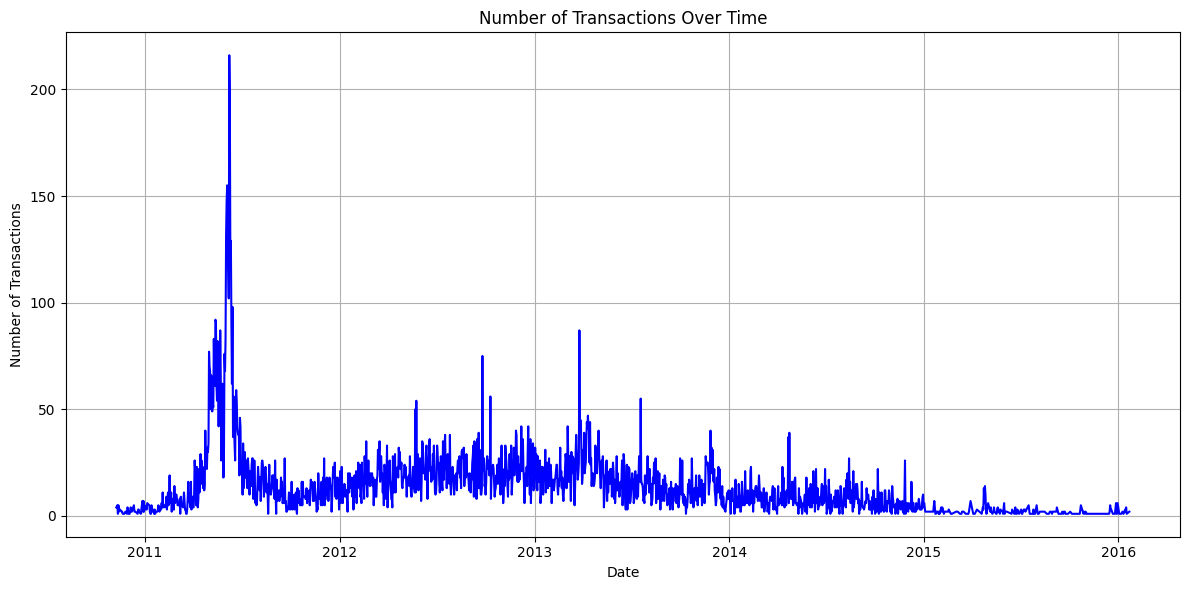

In [8]:
# Convert Unix timestamp to datetime
df['datetime'] = pd.to_datetime(df['TIME'], unit='s')

# Group by datetime to count the number of transactions per day
transactions_per_day = df.groupby(df['datetime'].dt.date).count()['TIME']

# Plotting the number of transactions over time
plt.figure(figsize=(12, 6))
transactions_per_day.plot(kind='line', title='Number of Transactions Over Time', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='datetime'>

<Axes: xlabel='datetime'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Trust Standard Variance and Mean')

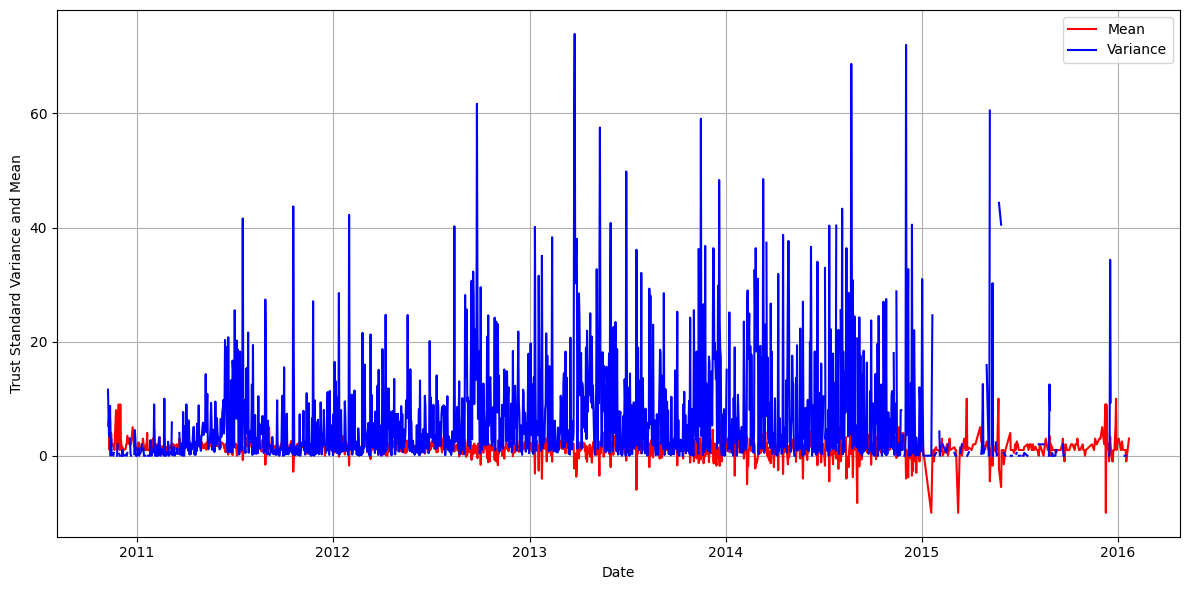

In [45]:
# Convert Unix timestamp to datetime
df['datetime'] = pd.to_datetime(df['TIME'], unit='s')

# Group by datetime to count the number of transactions per day
transactions_per_day = df.groupby(df['datetime'].dt.date)['RATING'].mean()
std = df.groupby(df['datetime'].dt.date)['RATING'].var()

# Plotting the number of transactions over time
plt.figure(figsize=(12, 6))
transactions_per_day.plot(kind='line', color='red', label='Mean')
std.plot(kind='line', color='blue', label = 'Variance')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Trust Standard Variance and Mean')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Top active nodes

In [9]:
# Counting occurrences of each address as source and target, then summing these counts
source_activities = df['SOURCE'].value_counts()
target_activities = df['TARGET'].value_counts()
total_activities = source_activities.add(target_activities, fill_value=0).sort_values(ascending=False)

# Displaying the top 10 addresses with the highest activities
top_10_active_addresses = total_activities.head(10)

print(top_10_active_addresses)


1      888.0
3      494.0
4      416.0
7      407.0
11     406.0
2      400.0
177    400.0
8      393.0
10     341.0
15     320.0
dtype: float64


#### Distribution of Ratings


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='RATING', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Transaction Ratings')

Text(0.5, 0, 'Rating (Transaction Amount)')

Text(0, 0.5, 'Frequency')

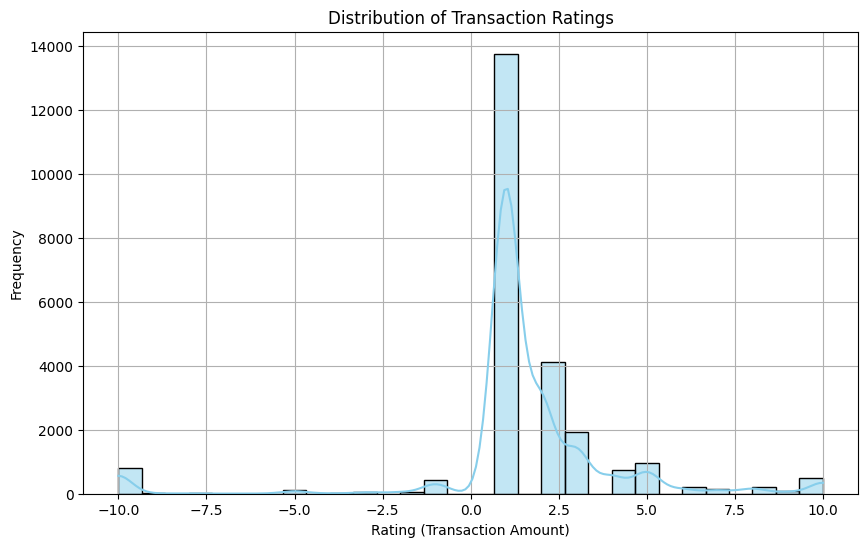

In [10]:
# Convert the 'RATING' column to numeric, if it's not already
df['RATING'] = pd.to_numeric(df['RATING'], errors='coerce')

# Plotting the distribution of transaction ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['RATING'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Transaction Ratings')
plt.xlabel('Rating (Transaction Amount)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [11]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

G = nx.from_pandas_edgelist(df, source='SOURCE', target='TARGET', edge_attr='RATING', create_using=nx.DiGraph())
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)


In [12]:
avg_trust_ratings = df.groupby('TARGET')['RATING'].mean().to_dict()


In [13]:
# Convert dictionaries to DataFrames
df_betweenness = pd.DataFrame(list(betweenness_centrality.items()), columns=['Node', 'Betweenness'])
df_eigenvector = pd.DataFrame(list(eigenvector_centrality.items()), columns=['Node', 'Eigenvector'])
df_trust = pd.DataFrame(list(avg_trust_ratings.items()), columns=['Node', 'AvgTrustRating'])

# Merge on Node
df_centralities = df_betweenness.merge(df_eigenvector, on='Node').merge(df_trust, on='Node')


### Explore the relationship between network attributes and ratings

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Betweenness', ylabel='AvgTrustRating'>

Text(0.5, 1.0, 'Betweenness Centrality vs. Average Trust Rating')

Text(0.5, 0, 'Betweenness Centrality')

Text(0, 0.5, 'Average Trust Rating')

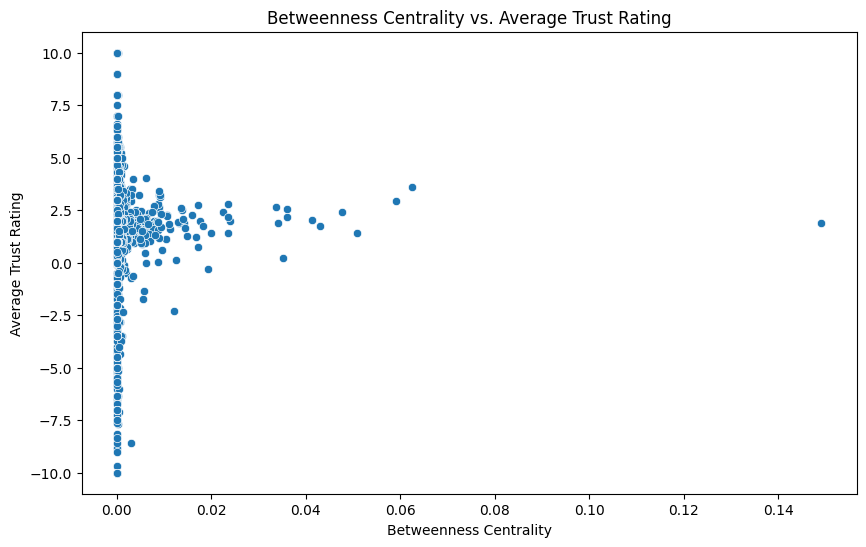

In [14]:
# Betweenness Centrality vs. Avg Trust Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_centralities, x='Betweenness', y='AvgTrustRating')
plt.title('Betweenness Centrality vs. Average Trust Rating')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Average Trust Rating')
plt.show()



Nodes that act as bridges (high betweenness centrality) in the network do not often receive extreme negative trust ratings. It seems that being a bridge correlates with a minimum level of trustworthiness, likely because these nodes facilitate transactions or information flow within the network and are therefore less likely to be distrusted.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Eigenvector', ylabel='AvgTrustRating'>

Text(0.5, 1.0, 'Eigenvector Centrality vs. Average Trust Rating')

Text(0.5, 0, 'Eigenvector Centrality')

Text(0, 0.5, 'Average Trust Rating')

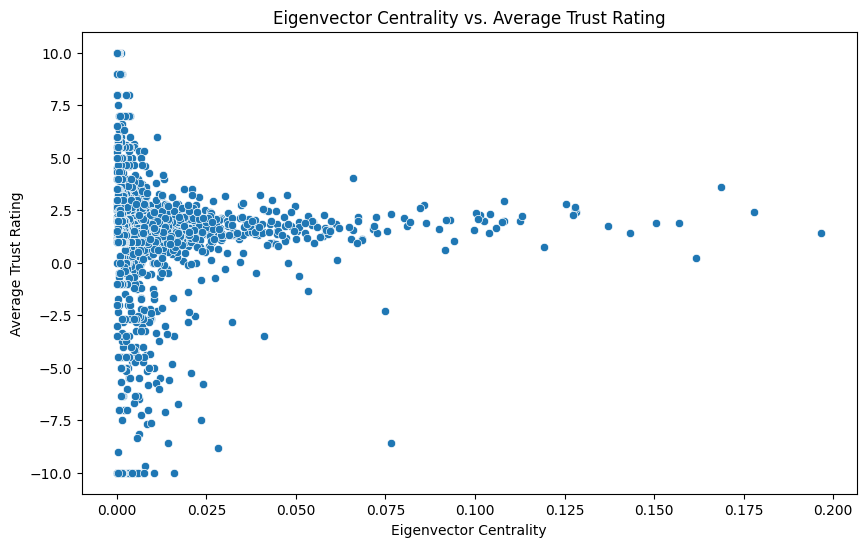

In [15]:
# Eigenvector Centrality vs. Avg Trust Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_centralities, x='Eigenvector', y='AvgTrustRating')
plt.title('Eigenvector Centrality vs. Average Trust Rating')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Average Trust Rating')
plt.show()


The second plot shows that nodes with high eigenvector centrality tend to have average to high positive trust ratings, with very few low or negative ratings. As eigenvector centrality decreases, the range of trust ratings becomes more diverse, including more negative ratings.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='InDegreeCentrality', ylabel='AvgTrustRating'>

Text(0.5, 1.0, 'In-Degree Centrality vs. Average Trust Rating')

Text(0.5, 0, 'In-Degree Centrality')

Text(0, 0.5, 'Average Trust Rating')

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='OutDegreeCentrality', ylabel='AvgTrustRating'>

Text(0.5, 1.0, 'Out-Degree Centrality vs. Average Trust Rating')

Text(0.5, 0, 'Out-Degree Centrality')

Text(0, 0.5, 'Average Trust Rating')

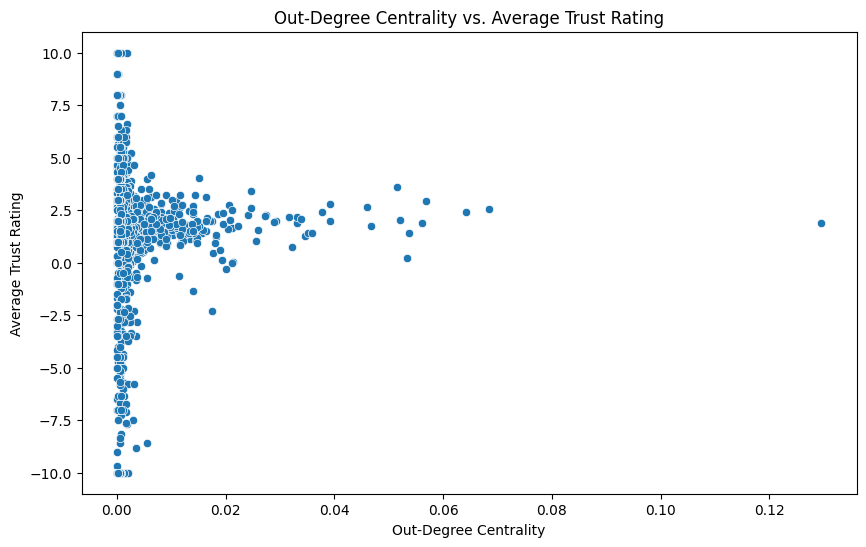

In [16]:
# Assuming 'G' is your directed NetworkX graph
in_degrees = nx.in_degree_centrality(G)
out_degrees = nx.out_degree_centrality(G)

# Convert these dictionaries to DataFrames for easy plotting
df_in_degrees = pd.DataFrame(in_degrees.items(), columns=['Node', 'InDegreeCentrality'])
df_out_degrees = pd.DataFrame(out_degrees.items(), columns=['Node', 'OutDegreeCentrality'])

# Merge these DataFrames with the DataFrame containing average trust ratings ('df_centralities')
df_centralities = df_centralities.merge(df_in_degrees, on='Node').merge(df_out_degrees, on='Node')

# Now you can create scatter plots to analyze the relationship between trust and degree centralities
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_centralities, x='InDegreeCentrality', y='AvgTrustRating')
plt.title('In-Degree Centrality vs. Average Trust Rating')
plt.xlabel('In-Degree Centrality')
plt.ylabel('Average Trust Rating')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_centralities, x='OutDegreeCentrality', y='AvgTrustRating')
plt.title('Out-Degree Centrality vs. Average Trust Rating')
plt.xlabel('Out-Degree Centrality')
plt.ylabel('Average Trust Rating')
plt.show()


#### Understand the relationship between the diversity of the nodes and the rating.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Diversity', ylabel='AvgTrustRating'>

Text(0.5, 1.0, 'Trust Rating vs. Connection Diversity')

Text(0.5, 0, 'Connection Diversity (Entropy)')

Text(0, 0.5, 'Average Trust Rating')

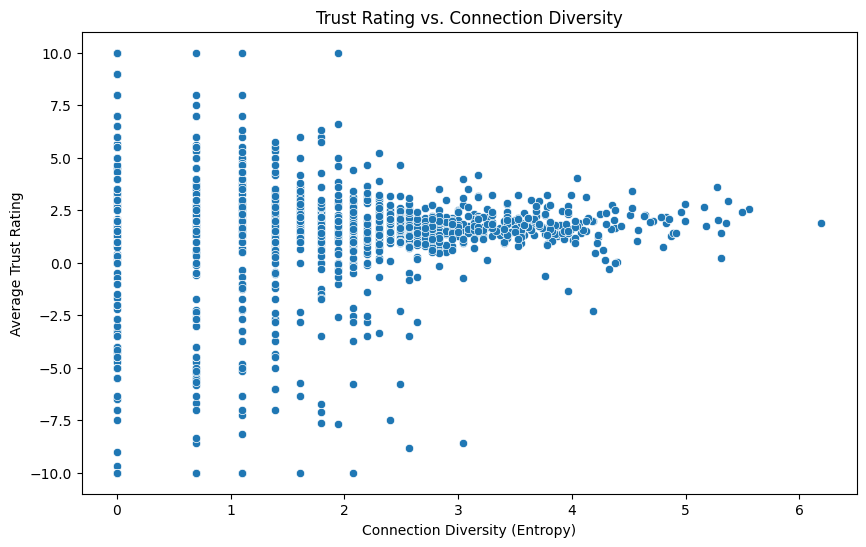

In [17]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

# Assuming G is your directed NetworkX graph

# Function to calculate the diversity of connections for a node
def calculate_diversity(G, node):
    neighbors = list(G.neighbors(node))
    neighbor_counts = pd.Series(neighbors).value_counts(normalize=True)
    diversity = entropy(neighbor_counts)
    return diversity

# Calculate diversity for each node
diversity_scores = {node: calculate_diversity(G, node) for node in G.nodes()}

# Get average trust ratings per node
average_trust = {node: np.mean([data['RATING'] for n1, n2, data in G.in_edges(node, data=True)]) for node in G.nodes()}

# Create DataFrame from the dictionaries
df_diversity_trust = pd.DataFrame({
    'Node': diversity_scores.keys(),
    'Diversity': diversity_scores.values(),
    'AvgTrustRating': average_trust.values()
})

# Plotting the Trust Rating vs. Connection Diversity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_diversity_trust, x='Diversity', y='AvgTrustRating')
plt.title('Trust Rating vs. Connection Diversity')
plt.xlabel('Connection Diversity (Entropy)')
plt.ylabel('Average Trust Rating')
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Node', ylabel='AvgTrustRating'>

Text(0.5, 1.0, 'Network Assortativity and Average Trust Rating')

Text(0.5, 0, 'Node')

Text(0, 0.5, 'Average Trust Rating')

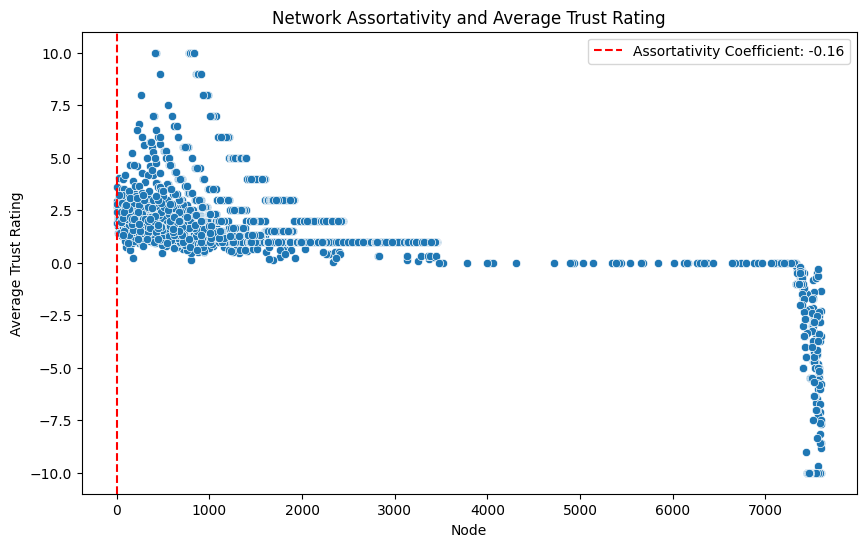

Network Assortativity Coefficient: -0.16348431165342667


In [18]:
G = nx.from_pandas_edgelist(df, 'SOURCE', 'TARGET', edge_attr='RATING', create_using=nx.DiGraph())

# Step 2: Calculate the assortativity coefficient
assortativity = nx.degree_assortativity_coefficient(G)

# Step 3: Calculate the average trust rating for each node
# Since the trust rating is from source to target, we'll calculate the average of incoming edges for each node
trust_ratings = {}
for node in G.nodes():
    ratings = [data['RATING'] for _, _, data in G.in_edges(node, data=True)]
    trust_ratings[node] = sum(ratings) / len(ratings) if ratings else 0

# Convert trust ratings to a DataFrame for easy plotting
trust_ratings_df = pd.DataFrame(list(trust_ratings.items()), columns=['Node', 'AvgTrustRating'])

# Step 4: Plotting
# Since assortativity is a scalar, it will be constant for all points, hence we plot it as a line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=trust_ratings_df, x='Node', y='AvgTrustRating')
plt.axvline(x=assortativity, color='red', linestyle='--', label=f'Assortativity Coefficient: {assortativity:.2f}')
plt.title('Network Assortativity and Average Trust Rating')
plt.xlabel('Node')
plt.ylabel('Average Trust Rating')
plt.legend()
plt.show()

# Output the assortativity coefficient
print(f'Network Assortativity Coefficient: {assortativity}')


ICM simulation
The Independent Cascade Model is a simple model for the spread of influence in a network. In the context of trust ratings, you could interpret an "activation" as a decision to trust or distrust. When a node becomes active (decides to trust/distrust), it has a single chance to activate each of its currently inactive neighbors (to influence their trust/distrust decision).

Red nodes are those that have become active (influenced to trust/distrust).
Blue nodes remain inactive (not yet influenced).
Green labels might represent initial seed nodes.


# Graph Networks Plots

#### ICM Simulation of a 50% drop in confidence

In [19]:
import random

def independent_cascade(G, seeds, steps=0):
    # G is the graph
    # seeds is a list of nodes to start the simulation with
    # steps is the number of steps to run the simulation; if 0, run until no more activations

    # Active nodes are those that have decided to trust/distrust
    active = set(seeds)
    new_active = set(seeds)

    # If steps is not 0, limit the number of iterations
    while new_active and (steps == 0 or len(active) < steps):
        # Set of nodes that will be activated in this iteration
        _new_active = set()
        # Iterate over each newly activated node
        for node in new_active:
            # Try to activate neighbors
            for neighbor in G.neighbors(node):
                if neighbor not in active:
                    # Activation success is determined by the trust rating as a probability
                    rating = G[node][neighbor]['RATING']
                    # Convert trust rating to a probability [0,1]
                    prob = (rating + 10) / 20  # Assuming ratings are from -10 to +10
                    if random.random() < prob:
                        _new_active.add(neighbor)
        new_active = _new_active
        active.update(new_active)
    return active


<Figure size 1200x800 with 0 Axes>

 ...]

{814: Text(-0.14854271709918976, -0.04119391366839409, '814'),
 827: Text(0.10530232638120651, -0.07389416545629501, '827'),
 791: Text(-0.0593765452504158, 0.015944013372063637, '791'),
 808: Text(-0.12687048316001892, 0.11175322532653809, '808'),
 837: Text(-0.7388921976089478, 0.4396171271800995, '837'),
 835: Text(-0.5893324017524719, -0.8250023126602173, '835'),
 823: Text(-0.22578522562980652, 0.17811515927314758, '823'),
 418: Text(-0.14642129838466644, -0.046319007873535156, '418'),
 805: Text(-0.9636800289154053, -0.07749547809362411, '805'),
 806: Text(-0.02450992539525032, 0.04959309473633766, '806'),
 828: Text(-0.3143056631088257, 0.39660048484802246, '828'),
 414: Text(-0.624104380607605, 0.6735292077064514, '414'),
 788: Text(-0.09515029937028885, 0.0009701570961624384, '788'),
 782: Text(-0.10675137490034103, -0.06920391321182251, '782'),
 797: Text(0.2708488404750824, 0.8393362164497375, '797'),
 829: Text(-0.07703511416912079, 0.10181480646133423, '829'),
 831: Text(0

Text(0.5, 1.0, 'Independent Cascade Model of Trust/Distrust Spread')

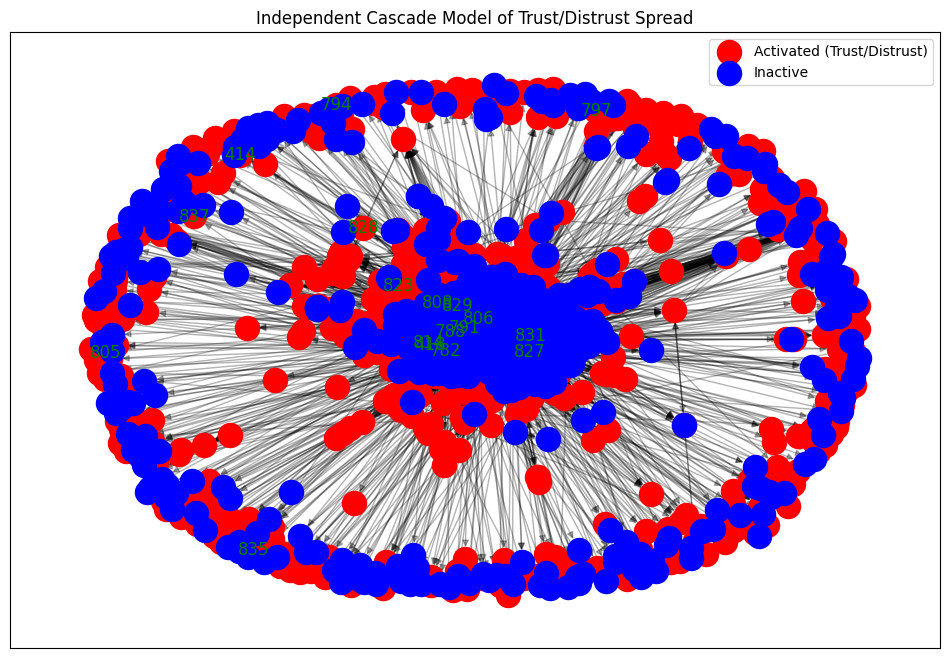

In [20]:
# Assume G is the graph and 'seeds' is the list of initial nodes
# Let's say we want to start with the top 0.5% of nodes by average trust rating as seeds
num_seeds = int(0.005 * len(G.nodes()))
top_nodes_by_trust = sorted(trust_ratings.items(), key=lambda x: x[1], reverse=True)[:num_seeds]
seeds = [node for node, _ in top_nodes_by_trust]

# Now you can use these seeds in the independent_cascade function
activated_nodes = independent_cascade(G, seeds)

# The rest of the simulation and visualization follows.

activated_nodes = independent_cascade(G, seeds)

# Visualization
pos = nx.spring_layout(G)  # Or any other layout
plt.figure(figsize=(12, 8))
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_nodes(G, pos, nodelist=activated_nodes, node_color='r', label='Activated (Trust/Distrust)')
nx.draw_networkx_nodes(G, pos, nodelist=set(G.nodes()) - activated_nodes, node_color='b', label='Inactive')
nx.draw_networkx_labels(G, pos, labels={node: node for node in seeds}, font_color='green')
plt.title('Independent Cascade Model of Trust/Distrust Spread')
plt.legend()
plt.show()


In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


# Function to simulate the Independent Cascade Model
def independent_cascade(G, seeds, p=0.1, steps=0):
    """
    Simulate the Independent Cascade model of influence propagation
    G: the graph
    seeds: list of initial active nodes
    p: probability of activation propagation
    steps: if 0, run until no more activations; otherwise, run for 'steps' iterations
    """
    active = set(seeds)
    new_active = set(seeds)

    while new_active and (steps == 0 or len(active) < steps):
        _new_active = set()
        for node in new_active:
            neighbors = set(G.neighbors(node)) - active
            for neighbor in neighbors:
                if random.random() < p:
                    _new_active.add(neighbor)
        active.update(_new_active)
        new_active = _new_active
    return active

# Identify the nodes to simulate a drop in trust
# Assuming you want to target the top 5% of nodes by betweenness centrality
top_5_percent = sorted(nx.betweenness_centrality(G).items(), key=lambda x: x[1], reverse=True)[:int(0.05 * len(G))]

# Simulate the drop in trust
# Assuming a 50% drop in trust rating
for node, _ in top_5_percent:
    for neighbor in G[node]:
        G[node][neighbor]['RATING'] *= 0.5

# Seed nodes for the simulation - the ones that experienced the drop
seed_nodes = [node for node, _ in top_5_percent]

# Run the Independent Cascade simulation
activated_nodes = independent_cascade(G, seed_nodes)

# Visualization of the result
pos = nx.spring_layout(G)  # Layout for the graph

# Draw the graph


<Figure size 1500x1000 with 0 Axes>

 ...]

Text(0.5, 1.0, 'Independent Cascade Model Simulation')

(-1.1687621557712553,
 1.1758444988727568,
 -1.2037595680356026,
 1.144326882660389)

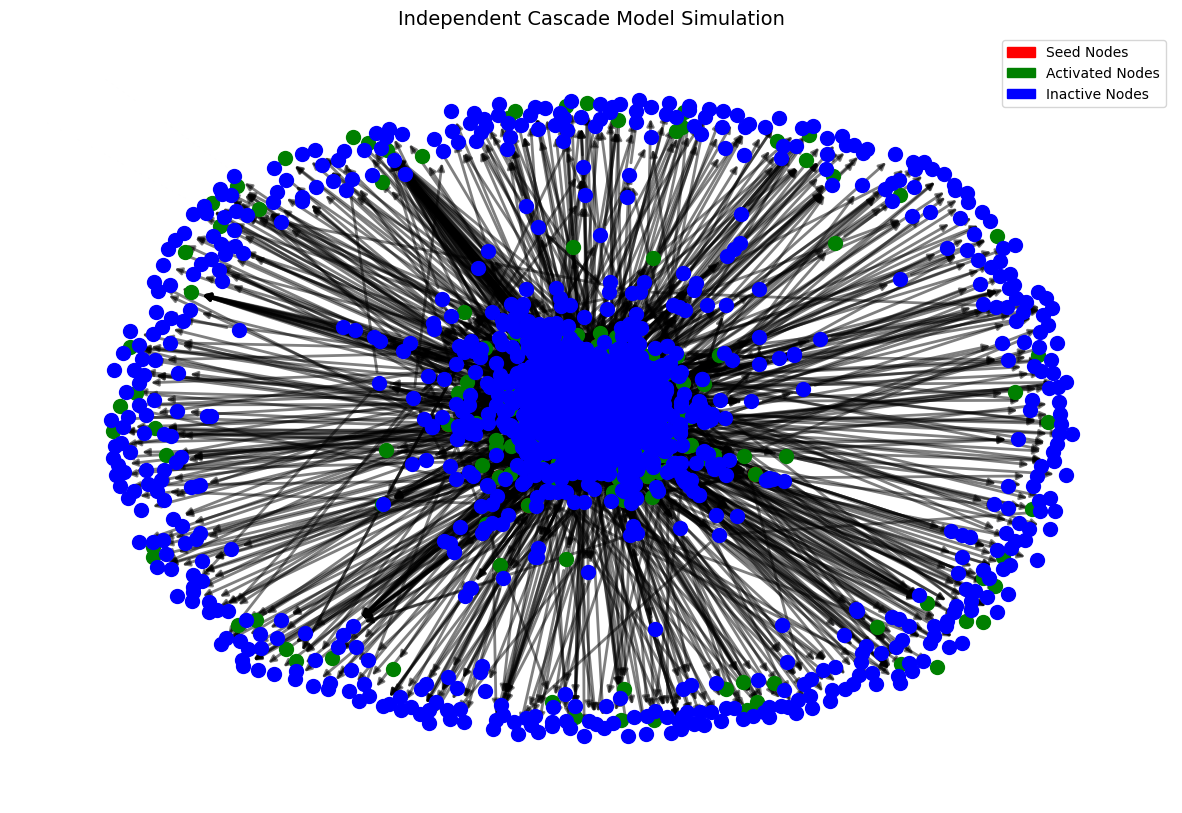

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming 'pos' is already defined, but you might want to adjust it for better clarity
# For example, pos = nx.spring_layout(G, scale=2) for a spring layout with more spread out nodes

plt.figure(figsize=(15, 10))  # Increase figure size

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5, width=2)  # Make edges more visible

# Draw nodes with specified options for better visibility
nx.draw_networkx_nodes(G, pos, nodelist=seed_nodes, node_size=100, node_color='red', label='Seed Nodes')
nx.draw_networkx_nodes(G, pos, nodelist=activated_nodes, node_size=100, node_color='green', label='Activated Nodes')
nx.draw_networkx_nodes(G, pos, nodelist=set(G.nodes()) - set(activated_nodes), node_size=100, node_color='blue', label='Inactive Nodes')

# Create custom legends
red_patch = mpatches.Patch(color='red', label='Seed Nodes')
green_patch = mpatches.Patch(color='green', label='Activated Nodes')
blue_patch = mpatches.Patch(color='blue', label='Inactive Nodes')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.title('Independent Cascade Model Simulation', fontsize=14)
plt.axis('off')  # Hide the axes
plt.show()


#### 2014 BTC fraud induced a slight drop in confidence across the netwrk of BTC-ALPHA

In [23]:

df['datetime'] = pd.to_datetime(df['TIME'], unit='s')

start_date_event = pd.to_datetime('2014-02-01')
end_date_event = pd.to_datetime('2014-02-28')

# Filter data for the event period and for normal periods
# Assuming 'normal' is defined as the month before the event
event_data = df[(df['datetime'] >= start_date_event) & (df['datetime'] <= end_date_event)]
normal_data = df[(df['datetime'] >= start_date_event - pd.DateOffset(months=1)) &
                 (df['datetime'] < start_date_event)]

# Create graphs for both periods
G_event = nx.from_pandas_edgelist(event_data, source='SOURCE', target='TARGET', edge_attr='RATING', create_using=nx.DiGraph())
G_normal = nx.from_pandas_edgelist(normal_data, source='SOURCE', target='TARGET', edge_attr='RATING', create_using=nx.DiGraph())

# Calculate network statistics for each graph
# Example: Average trust rating (using the 'Weight' as a proxy for trust rating)
avg_trust_event = event_data['RATING'].mean()
avg_trust_normal = normal_data['RATING'].mean()

# Compare statistics between the two periods
comparison_stats = {
    'average_trust_event': avg_trust_event,
    'average_trust_normal': avg_trust_normal,
    'transactions_event': G_event.number_of_edges(),
    'transactions_normal': G_normal.number_of_edges()
}

comparison_stats


{'average_trust_event': 0.37282229965156793,
 'average_trust_normal': 1.849802371541502,
 'transactions_event': 287,
 'transactions_normal': 253}

<Figure size 1400x700 with 0 Axes>

<Axes: xlabel='datetime'>

Text(0.5, 1.0, 'Daily Average Trust Rating Before and During the Hacking Incident')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Average Trust Rating')

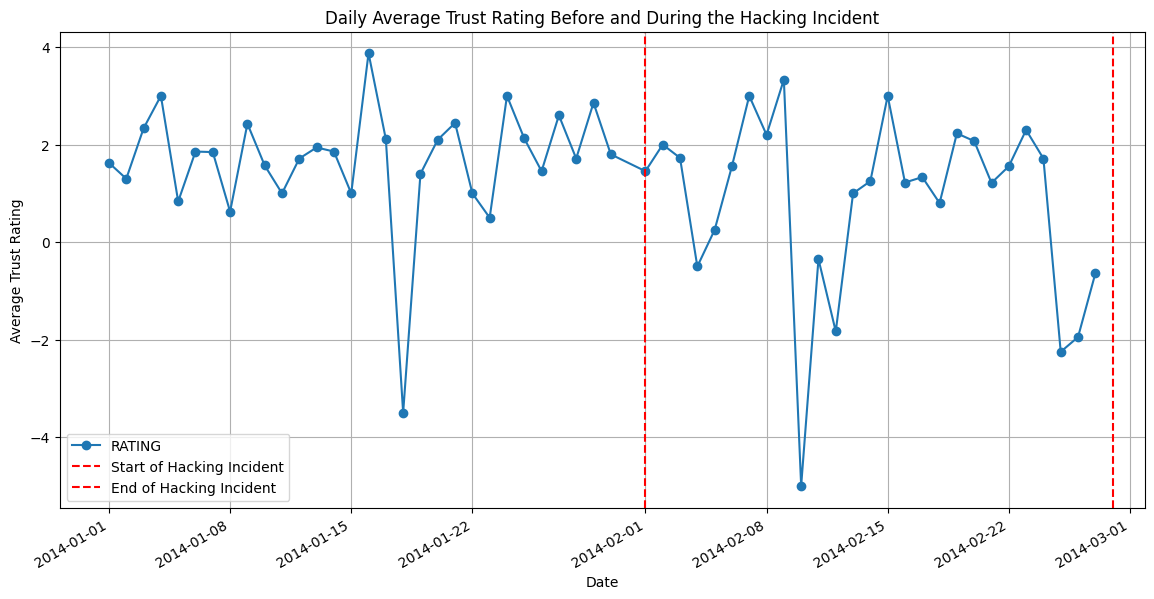

In [24]:

df['datetime'] = pd.to_datetime(df['TIME'], unit='s')

# Define the period of the hacking incident (February 2014)
incident_start = pd.to_datetime('2014-02-01')
incident_end = pd.to_datetime('2014-02-28')

# Define the normal period (the month before the incident)
normal_start = pd.to_datetime('2014-01-01')
normal_end = pd.to_datetime('2014-01-31')

# Filter the DataFrame for both periods
incident_data = df[(df['datetime'] >= incident_start) & (df['datetime'] <= incident_end)]
normal_data = df[(df['datetime'] >= normal_start) & (df['datetime'] < normal_end)]

# Create network graphs for both periods
G_incident = nx.from_pandas_edgelist(incident_data, 'SOURCE', 'TARGET', edge_attr='RATING', create_using=nx.DiGraph())
G_normal = nx.from_pandas_edgelist(normal_data, 'SOURCE', 'TARGET', edge_attr='RATING', create_using=nx.DiGraph())

# Calculate average trust rating for both periods
avg_trust_incident = incident_data['RATING'].mean()
avg_trust_normal = normal_data['RATING'].mean()

# Visualize the drop in confidence with a line graph
import matplotlib.pyplot as plt

# Create a time series DataFrame with daily averages
incident_series = incident_data.set_index('datetime').resample('D')['RATING'].mean()
normal_series = normal_data.set_index('datetime').resample('D')['RATING'].mean()

# Combine the data into a single DataFrame
combined_series = pd.concat([normal_series, incident_series], axis=0)

# Plotting
plt.figure(figsize=(14, 7))
combined_series.plot(kind='line', marker='o')
plt.axvline(x=incident_start, color='r', linestyle='--', label='Start of Hacking Incident')
plt.axvline(x=incident_end, color='r', linestyle='--', label='End of Hacking Incident')
plt.title('Daily Average Trust Rating Before and During the Hacking Incident')
plt.xlabel('Date')
plt.ylabel('Average Trust Rating')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import networkx as nx

# Assuming 'df' is your DataFrame containing the BTC Alpha network data
# and 'G' is a NetworkX graph created from df

# Step 1: Aggregate trust ratings for each node
# Calculate average trust rating given by each node
avg_trust_given = df.groupby('SOURCE')['RATING'].mean().reset_index(name='avg_trust_given')
# Calculate average trust rating received by each node
avg_trust_received = df.groupby('TARGET')['RATING'].mean().reset_index(name='avg_trust_received')

# Merge these averages into a single DataFrame
node_trust = pd.merge(avg_trust_given, avg_trust_received, left_on='SOURCE', right_on='TARGET', how='outer')
node_trust.fillna(0, inplace=True)  # Replace NaNs with 0 for nodes that only give or only receive ratings

# Step 2: Prepare data for anomaly detection
# For simplicity, we're using just the trust metrics, but you could include more network features
X = node_trust[['avg_trust_given', 'avg_trust_received']]

# Step 3: Apply the Isolation Forest algorithm
clf = IsolationForest(random_state=42, contamination='auto')
node_trust['anomaly'] = clf.fit_predict(X)

# Step 4: Analyze the results
# Nodes marked as -1 are considered anomalies
anomalies = node_trust[node_trust['anomaly'] == -1]

print("Detected Anomalies:")
print(anomalies)


Detected Anomalies:
      SOURCE  avg_trust_given  TARGET  avg_trust_received  anomaly
19      20.0         3.578947    20.0            4.018868       -1
51      53.0        -0.789474    53.0            2.973684       -1
109    111.0        -0.923077   111.0            2.576923       -1
127    129.0         4.516129   129.0            3.411765       -1
145    147.0         5.666667   147.0            4.636364       -1
...      ...              ...     ...                 ...      ...
3778     0.0         0.000000  7557.0           -6.500000       -1
3779     0.0         0.000000  7559.0           -6.500000       -1
3780     0.0         0.000000  7567.0           -9.666667       -1
3781     0.0         0.000000  7572.0          -10.000000       -1
3782     0.0         0.000000  7574.0          -10.000000       -1

[520 rows x 5 columns]


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='avg_trust_given', ylabel='avg_trust_received'>

Text(0.5, 1.0, 'Scatter Plot of Anomalies in Trust Given vs. Trust Received')

Text(0.5, 0, 'Average Trust Given')

Text(0, 0.5, 'Average Trust Received')

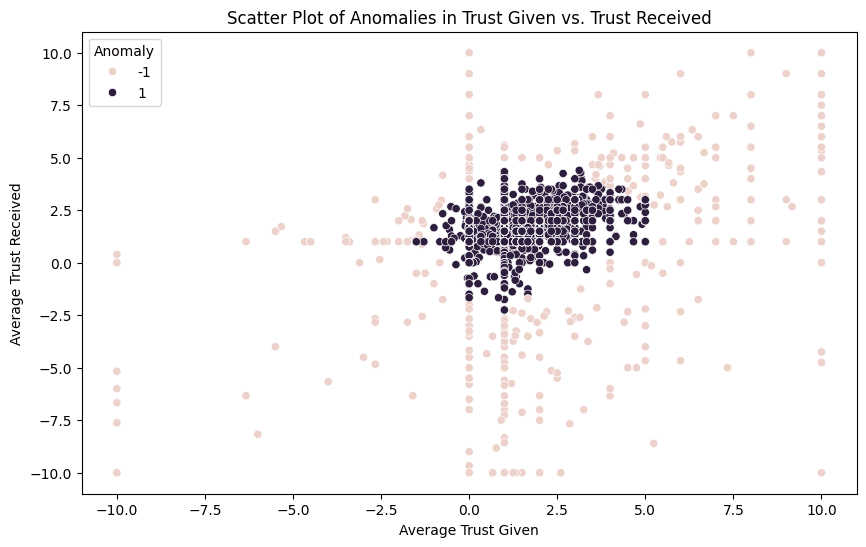

In [53]:
import seaborn as sns

# Assuming 'anomalies' is a DataFrame with the anomalies detected from previous steps
# and it contains 'avg_trust_given', 'avg_trust_received', and 'anomaly' columns
# Note that hue parameter is not used with plt.scatter in matplotlib, it's a seaborn feature.
# Therefore, we'll use seaborn's scatterplot function instead.

# Create the scatterplot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=node_trust, x='avg_trust_given', y='avg_trust_received', hue='anomaly', )

# Define the title and the labels of the plot
plt.title('Scatter Plot of Anomalies in Trust Given vs. Trust Received')
plt.xlabel('Average Trust Given')
plt.ylabel('Average Trust Received')

# Show the plot
plt.legend(title='Anomaly')
plt.show()


In [ ]:
# @title SOURCE

from matplotlib import pyplot as plt
anomalies['SOURCE'].plot(kind='hist', bins=20, title='SOURCE')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Figure size 1000x800 with 0 Axes>

 ...]

(-1.2039779829978943, 1.146625440120697, -1.182389043569565, 1.168613933324814)

Text(0.5, 1.0, 'Network Graph with Anomalies Highlighted')

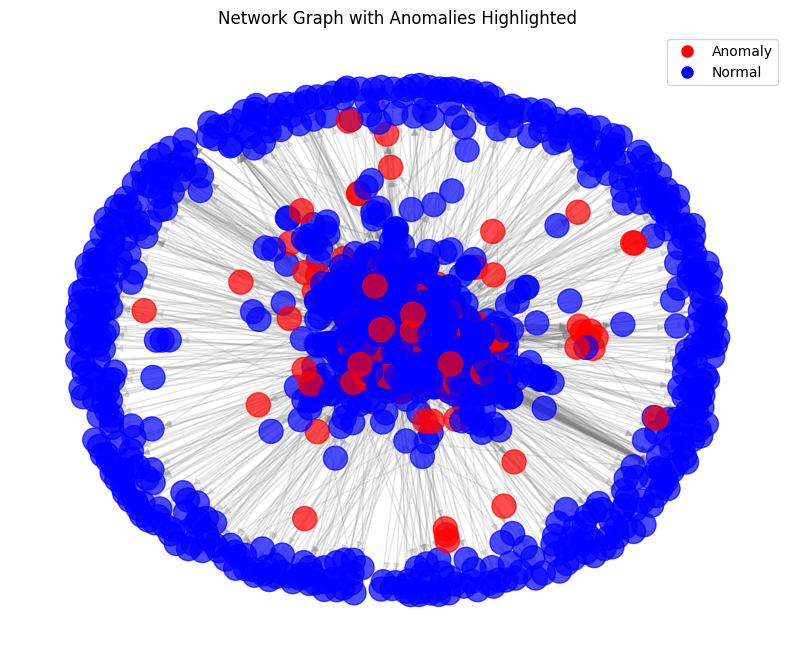

In [26]:
import matplotlib.pyplot as plt

# Assuming 'G' is the graph created from your dataset
# and 'anomalies' is the DataFrame containing nodes detected as anomalies

# Convert anomalies' SOURCE column to a list for easy filtering
anomaly_nodes = anomalies['SOURCE'].tolist()

# Define node colors: 'red' for anomalies, 'blue' for normal nodes
node_colors = ['red' if node in anomaly_nodes else 'blue' for node in G.nodes()]

# Plot the network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Positions for all nodes

# Drawing nodes
nx.draw_networkx_nodes(G, pos, node_color=node_colors, alpha=0.7)

# Drawing edges
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.2)

# Remove axis
plt.axis('off')

# Add title and legend
plt.title('Network Graph with Anomalies Highlighted')
red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Anomaly')
blue_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Normal')
plt.legend(handles=[red_patch, blue_patch])

plt.show()


# Machine learning

In [28]:
# Assume 'df' is pre-loaded with the BTC Alpha network data
# Compute network-based features for each node
centrality = nx.degree_centrality(G)
# Add more network features as needed

# Assume anomaly scores are already computed and stored in 'node_trust'
node_features = pd.DataFrame({
    'node': list(G.nodes()),
    'centrality': [centrality[node] for node in G.nodes()],
    'anomaly_score': node_trust['anomaly']  # Ensure this matches your anomaly score column
}).set_index('node')

# Normalize features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
node_features_scaled = pd.DataFrame(scaler.fit_transform(node_features), columns=node_features.columns, index=node_features.index)

from sklearn.cluster import KMeans

# Fit K-Means
kmeans = KMeans(n_clusters=2, random_state=42).fit(node_features_scaled)

# Assign cluster labels back to nodes
node_features['cluster'] = kmeans.labels_

# Heuristically identify which cluster might represent a 'confidence drop'
# This could be based on lower average trust ratings or higher anomaly scores within the cluster
confidence_drop_cluster = node_features.groupby('cluster').mean().idxmin()['anomaly_score']
node_features['confidence_drop'] = (node_features['cluster'] == confidence_drop_cluster).astype(int)


<Figure size 1200x1200 with 0 Axes>

 ...]

Text(0.5, 1.0, 'Network Confidence Visualization Post-February 2014 Bitcoin Hack')

(-1.2072336763143539,
 1.1808884233236312,
 -1.190340911746025,
 1.198194300532341)

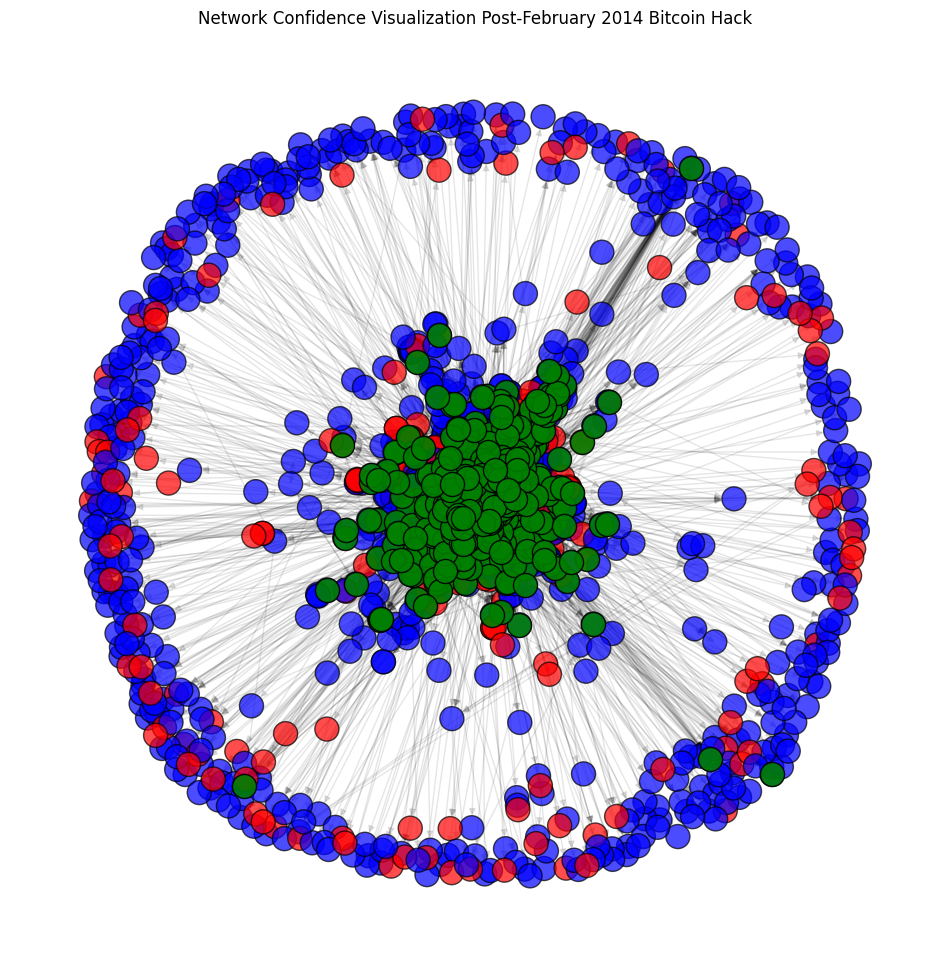

In [32]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming 'G' is your graph, and 'node_features' contains a 'confidence_drop' column from the clustering

# Simplify the graph visualization by focusing on a subgraph of interest if needed
# For this example, we visualize the entire graph for clarity

# Determine node colors based on 'confidence_drop' label
node_colors = ['red' if node_features.loc[node, 'confidence_drop'] == 1 else 'blue' for node in G.nodes()]

# Optionally, identify key nodes to highlight (e.g., high-degree nodes or anomalies)
key_nodes = [node for node in G.nodes() if G.degree(node) > np.percentile([G.degree(n) for n in G.nodes()], 75)]

# Create the network visualization
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # For consistent layout between runs

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color=node_colors, alpha=0.7, edgecolors='k')  # Edgecolors='k' adds a border for visibility

# Highlight key nodes with a distinct marker
nx.draw_networkx_nodes(G, pos, nodelist=key_nodes, node_color='green', edgecolors='k', alpha=0.9)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.1)

plt.title('Network Confidence Visualization Post-February 2014 Bitcoin Hack')
plt.axis('off')  # Hide axes for a cleaner look
plt.show()


In [34]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Position nodes using the spring layout

# Draw all nodes
nx.draw_networkx_nodes(G, pos, node_color=node_colors, alpha=0.7, edgecolors='k')

# Highlight key nodes
nx.draw_networkx_nodes(G, pos, nodelist=key_nodes, node_color='green', edgecolors='k', alpha=0.9)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.1)

# Add labels only to key nodes to avoid clutter
labels = {node: node for node in key_nodes}  # Create a label dict for key nodes
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='black')

plt.title('Network Confidence Visualization Post-February 2014 Bitcoin Hack')
plt.axis('off')
plt.show()

<Figure size 1200x1200 with 0 Axes>

 ...]

{1: Text(0.00422500167042017, -0.004503034055233002, '1'),
 430: Text(0.09397035837173462, -0.0005892832414247096, '430'),
 804: Text(0.06686512380838394, -0.005772951524704695, '804'),
 160: Text(0.19319936633110046, -0.06827523559331894, '160'),
 95: Text(0.029703369364142418, 0.00010174110502703115, '95'),
 89: Text(-0.03728942573070526, 0.08269230276346207, '89'),
 161: Text(0.14388802647590637, 0.13682995736598969, '161'),
 256: Text(-0.052280690521001816, -0.009466467425227165, '256'),
 351: Text(-0.06724785268306732, -0.03333128243684769, '351'),
 649: Text(0.036360569298267365, 0.04234808310866356, '649'),
 87: Text(0.025105539709329605, -0.015626903623342514, '87'),
 37: Text(0.019971413537859917, 0.05226019769906998, '37'),
 309: Text(0.008918602019548416, 0.02822149358689785, '309'),
 637: Text(-0.020889732986688614, 0.04884057119488716, '637'),
 20: Text(0.09120019525289536, 0.0941883847117424, '20'),
 519: Text(0.04691150784492493, 0.06010162830352783, '519'),
 18: Text(0.

Text(0.5, 1.0, 'Network Confidence Visualization Post-February 2014 Bitcoin Hack')

(-1.2072336763143539,
 1.1808884233236312,
 -1.190340911746025,
 1.198194300532341)